<style>
    p { color: red; }
</style>

<hr style="height:4px; border:none; color:black; background-color:black;">

### HTML

In [1]:
%%HTML
<style>
  div.prompt {display:none}
  div {line-height: 150%;}
  li {color:black; font-size:large}
  p {color:black; font-size:large;}
  p.k {color:black; font-size:110%; font-family: Consolas, monaco, monospace;}
  ul {list-style-type: none;}
</style>

### SYSTEM PATH

In [2]:
import sys, os
print("\nSYSTEM PATH BEFORE\n", sys.path)
path_extend = os.path.abspath('./lib')
if path_extend not in sys.path:
    sys.path.insert(0, path_extend)
print("\nSYSTEM PATH AFTER\n", sys.path)

### CURRENT WORKING DIRECTORY

In [3]:
import classes

util = classes.util()
util.getCwd()

### IMPORTS

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<hr style="height:4px; border:none; color:black; background-color:black;">

<h1><center><u>Objects in Earth Orbit</u></center></h1>

1. [Project Description](#pc1)  
    1.1 [Background](#pc1)  
    1.2 [Project Capabilities](#pc2)  
    1.3 [Questions That Can Be Answered Using These Capabilities](#pc3)  
    <br>
2. [GPS Satellites](#gs0)  
    2.1 [Obtain The Raw Data](#gs1)  
    2.2 [Transform The Data Into Useful Columns](#gs2)  
    2.3 [Visualize The Data](#gs3)  
    2.4 [Analyze The Data](#gs4)  
    <br>
3. [Orbital Objects](#oo0)  
    3.1 [Chinese Anti-Satellite Missile Test Debris](#oo1)  
    3.2 [The International Space Station](#oo2)  
    3.3 [The Hubble Space Telescope](#oo3)  

<a id="pc1"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

# 1. Project Description
## 1.1 Background

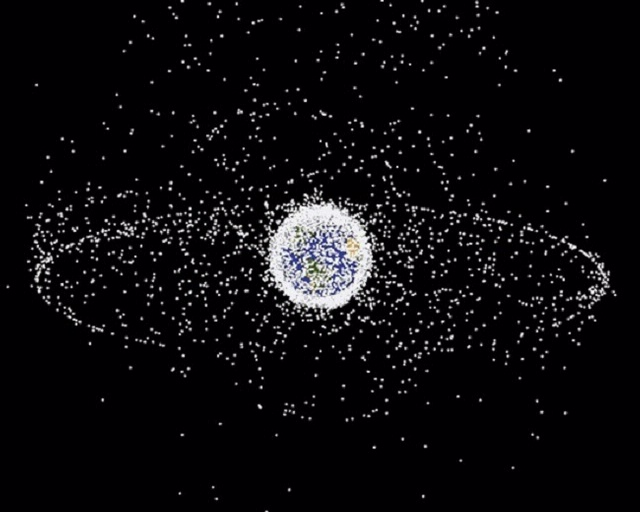

In [5]:
from IPython import display 
display.Image("data/7423_640.jpg")

### There are many types of objects in orbit around the earth:

* Communication satellites
* GPS satellites
* Weather satellites
* Scientific satellites
* Space debris
* The International Space Station
* The Hubble Space Telescope

> [What Is An Orbit?](https://www.nasa.gov/audience/forstudents/5-8/features/nasa-knows/what-is-orbit-58.html)

The positions of these objects in orbit are being monitored continuously using ground monitor stations and near space radar. Current and historical information related to orbitting objects is mostly public and available from certain websites, for example:

> [NORAD Current Orbital Data](https://celestrak.com/NORAD/elements/)  
> [NORAD Archives](https://celestrak.com/NORAD/archives/)

Sometimes a satellite must be repositioned. For example, GPS satellites must maintain positions relative to each other. 

> [Repositioning Satellites](https://www.satsig.net/orbit-research/geo-orbit-repositioning.htm)

This shows that satellite positions are publically available and can be received in real-time:

> [Real-Time Satellite Locations](https://in-the-sky.org/satmap_worldmap.php)


<a id="pc2"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 1.2 Project Capabilities

1. Create a general capability to download information related to objects in orbit. This information includes:
    * Current position and trajectory
    * Historical positions and trajectories
    * Type of object, satellite or debris, launch date, satellite characteristics
    * When was a satellite re-positioned 
    * What sensor is recording the data: ground monitor station, near space radar?<br>
    <br>
2. Create a *specific* capability to download information related to the satellites in the GPS constellation. This includes detailed position, orbital data, the characteristics and history of the GPS satellite.<br>
    <br>
3. Create a *specific* capability to download information related to space debris and in particular the Chinese Anti-Satellite Missile Test Debris.

<a id="pc3"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

<a id="pc2"></a>
## 1.3 Questions That Can Be Answered Using These Capabilities 
<a id="pc2"></a>
* Is a GPS satellite moving outside of its designated orbit?
* Is a GPS satellite too close or too far from adjacent satellites in its orbit?
* Predict if it is likely that a GPS satellite will be repositioned by the Space Operations Squadron within the next 10 days.
* For a particular GPS satellite, what are the 100 closest debris objects at the current time?
* Predict the likelihood of space debris entering a danger zone around a GPS satellite.
* Estimate the probability that a particular debris object is associated with a particular debris cloud
* Based on the kinetic energy of a debris object, when is it likely that the debris object will enter the earth's atmosphere?
* What is the likelihood that a space debris object or a retired satellite will reach the earth? When and where?

<a id="gs0"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

# 2. GPS Satellites

There are currently 30 satellites in the GPS constellation contained in 6 orbital planes. Each GPS satellite orbits twice per 24 hour day around the earth. The goal of the GPS constellation is to make sure that at least 4 GPS satellites are covering every point on the earth at any one time. There also exist much space debris (for various reasons) orbiting the earth. For example, a large pattern of space debris was created in 2007 when the Chinese intentionally destroyed its own satellite. The locations of satellites and space debris are mostly public information. This project proposes to monitor GPS satellite locations and their positions in space relative to space debris, including the Chinese anti-satellite missile test debris. The goal of this project is to determine how close space debris might come to our essential GPS fleet.

The GPS satellite data is presented in CSV format by the URL
> https://celestrak.com/NORAD/elements/gp.php?GROUP=GPS-OPS&FORMAT=CSV

It can be copied and pasted into an empty .csv file<br><br>
Similarly, the Chinese debris is available at
> https://celestrak.com/NORAD/elements/gp.php?CATNR=25544&FORMAT=CSV

<a id="gs1"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 2.1 Obtain the Raw Data

In [6]:
import pycurl, csv
from io import BytesIO

"""
CsvToDataFrame
"""

class CsvToDataFrame(object):
    
    csv_file = 'data/Artworks.csv'

    def __init__(self, url, csvFile):
        self.url = url
        self.csvFile = csvFile
        pass

    def downloadCsvFile(self):
        # buffer to receive the data
        buffer = BytesIO()

        # read into the buffer
        c = pycurl.Curl()
        c.setopt(c.URL, self.url)
        c.setopt(c.WRITEDATA, buffer)
        c.perform()
        c.close()

        # obtain the content
        content = buffer.getvalue()

        # write to the CSV file
        with open(self.csvFile, 'w') as f:
            print(content.decode('iso-8859-1'), file=f)

        # show result
        fullPath = os.path.abspath(csvFile)
        file = open(fullPath)
        reader = csv.reader(file)
        numberRecords = len(list(reader))
        print(f'\n{numberRecords} records have been downloaded to the file: {fullPath}')
        
    def remove_spaces(self, colname):
        return colname.strip().replace(' ','_')

    def convertToDataFrame(self):
        self.orig = pd.read_csv(self.csvFile)
        self.orig.rename(columns = self.remove_spaces, inplace=True)

    def transformColumns(self):
        # extract date/time column
        self.df = self.orig.assign(
            date_time = lambda this : this.EPOCH.str[0:16].str.replace("T", " "))

        # extract the PRN
        self.df["PRN"] = (
            self.df["OBJECT_NAME"].str.replace(".*PRN", "PRN", regex=True)
                                  .str.replace("\).*", "", regex=True)) 

        # select the columns of interest
        self.df = self.df.loc[:, ['date_time', 'OBJECT_NAME', 'PRN', 'ARG_OF_PERICENTER', 'RA_OF_ASC_NODE']]

        # sort the columns by date and time
        self.df.sort_values(by=['date_time'], ascending=True, inplace=True)
        
    def text(self):
        print(f'Index is:\n{gps.df.index}',
              f'Columns are:\n{gps.df.columns}',
              f'Values are:\n{gps.df.values[0:3]}', sep='\n\n')

In [7]:
url = "https://celestrak.com/NORAD/elements/gp.php?GROUP=GPS-OPS&FORMAT=CSV"
csvFile = 'data/gps-today.csv'
gps = CsvToDataFrame(url, csvFile)
gps.downloadCsvFile()
gps.convertToDataFrame()
gps.transformColumns()
gps.text()


32 records have been downloaded to the file: /home/kurt/work/gps-satellites/jupyter/data/gps-today.csv
Index is:
Int64Index([23, 18, 26, 21, 11, 14, 19,  8,  6,  7, 17, 10, 22, 20, 16, 13,  0,
            15,  9, 24, 29, 25, 12,  4,  3,  5,  1, 27,  2, 28],
           dtype='int64')

Columns are:
Index(['date_time', 'OBJECT_NAME', 'PRN', 'ARG_OF_PERICENTER',
       'RA_OF_ASC_NODE'],
      dtype='object')

Values are:
[['2021-02-23 02:10' 'GPS BIIF-9  (PRN 26)' 'PRN 26' 13.4005 284.5302]
 ['2021-02-25 04:55' 'GPS BIIF-4  (PRN 27)' 'PRN 27' 32.049 346.792]
 ['2021-02-25 09:12' 'GPS BIIF-12 (PRN 32)' 'PRN 32' 222.978 166.4018]]


<a id="gs2"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 2.2 Transform The Data Into Useful Columns

### Open the CSV File

### Columns of Raw Data

In [8]:
gps.df.iloc[:,:]

,date_time,OBJECT_NAME,PRN,ARG_OF_PERICENTER,RA_OF_ASC_NODE
23,2021-02-23 02:10,GPS BIIF-9 (PRN 26),PRN 26,13.4005,284.5302
18,2021-02-25 04:55,GPS BIIF-4 (PRN 27),PRN 27,32.0490,346.7920
26,2021-02-25 09:12,GPS BIIF-12 (PRN 32),PRN 32,222.9780,166.4018
21,2021-02-25 13:39,GPS BIIF-7 (PRN 09),PRN 09,106.1310,165.8424
11,2021-02-25 18:00,GPS BIIRM-4 (PRN 15),PRN 15,54.9495,160.2971
14,2021-02-26 04:18,GPS BIIRM-8 (PRN 05),PRN 05,49.0187,104.7566
19,2021-02-26 04:51,GPS BIIF-5 (PRN 30),PRN 30,199.6845,228.3462
8,2021-02-26 14:59,GPS BIIRM-1 (PRN 17),PRN 17,269.6816,350.1813
6,2021-02-26 15:27,GPS BIIR-11 (PRN 19),PRN 19,102.5369,352.7737
7,2021-02-26 18:35,GPS BIIR-13 (PRN 02),PRN 02,271.6157,42.5850


### Transform the data, select and sort columns

### Show the Useful Columns

In [9]:
gps.df.iloc[:,:]

,date_time,OBJECT_NAME,PRN,ARG_OF_PERICENTER,RA_OF_ASC_NODE
23,2021-02-23 02:10,GPS BIIF-9 (PRN 26),PRN 26,13.4005,284.5302
18,2021-02-25 04:55,GPS BIIF-4 (PRN 27),PRN 27,32.0490,346.7920
26,2021-02-25 09:12,GPS BIIF-12 (PRN 32),PRN 32,222.9780,166.4018
21,2021-02-25 13:39,GPS BIIF-7 (PRN 09),PRN 09,106.1310,165.8424
11,2021-02-25 18:00,GPS BIIRM-4 (PRN 15),PRN 15,54.9495,160.2971
14,2021-02-26 04:18,GPS BIIRM-8 (PRN 05),PRN 05,49.0187,104.7566
19,2021-02-26 04:51,GPS BIIF-5 (PRN 30),PRN 30,199.6845,228.3462
8,2021-02-26 14:59,GPS BIIRM-1 (PRN 17),PRN 17,269.6816,350.1813
6,2021-02-26 15:27,GPS BIIR-11 (PRN 19),PRN 19,102.5369,352.7737
7,2021-02-26 18:35,GPS BIIR-13 (PRN 02),PRN 02,271.6157,42.5850


<a id="gs3"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 2.3 Visualize The Data

### Plotting Functions

In [10]:

"""
Plotting
"""
class Plotting(object):
    
    linestyles = ['-', '--', '-.', ':', ':o']

    def __init__(self):
        pass

    def plotReset(self):
        plt.clf # clear figure
        plt.cla # clear axes
        plt.figure(figsize=(15,15)) # this also clears the previous plot

    def plotScatter(self, xColumn, yColumn, dataframe, color=None):
        if False: plt.scatter(env[xColumn], env[yColumn], alpha=1.0, zorder=2)
        if False: plt.plot(env[xColumn], env[yColumn], linestyle='dotted', alpha=0.8, zorder=1)
        plt.plot(dataframe[xColumn], dataframe[yColumn], 'o', alpha=1.0, color=color)

    def plotFormats(self, title, xLabel, yLabel, legend, 
                    xLim = (None,None), 
                    yLim = (None,None),
                    xTicks = (None,None,None), 
                    yTicks = (None,None,None)):
        plt.xlabel(xLabel, fontsize=15, color='darkblue')
        plt.ylabel(yLabel, fontsize=15, color='darkblue')
        plt.xlim(xLim[0], xLim[1])
        plt.ylim(yLim[0], yLim[1])
        plt.title(title, fontsize=15, color='darkblue');
        plt.grid(True)
        plt.legend(legend[0], loc=legend[1])
        plt.xticks(fontsize=14, rotation=45)
        plt.yticks(fontsize=14, rotation=45)
        if xTicks[0] != None:
            plt.xticks(np.arange(xTicks[0], xTicks[1], step=xTicks[2]))
        if yTicks[0] != None:
            plt.yticks(np.arange(yTicks[0], yTicks[1], step=yTicks[2]))
        return
    
    def labelPoints(self, df):
        for i in df.index:
            plt.text(df['RA_OF_ASC_NODE'][i] + 1.5,    # X location
                     df['ARG_OF_PERICENTER'][i] + 1.5, # Y location
                     df['PRN'][i] + '\n' +             # text
                     df['date_time'][i][5:].replace('-','/'),
                     horizontalalignment='left')
 

### Show the Azimuth, Elevation and Timestamp of Each GPS Satellite

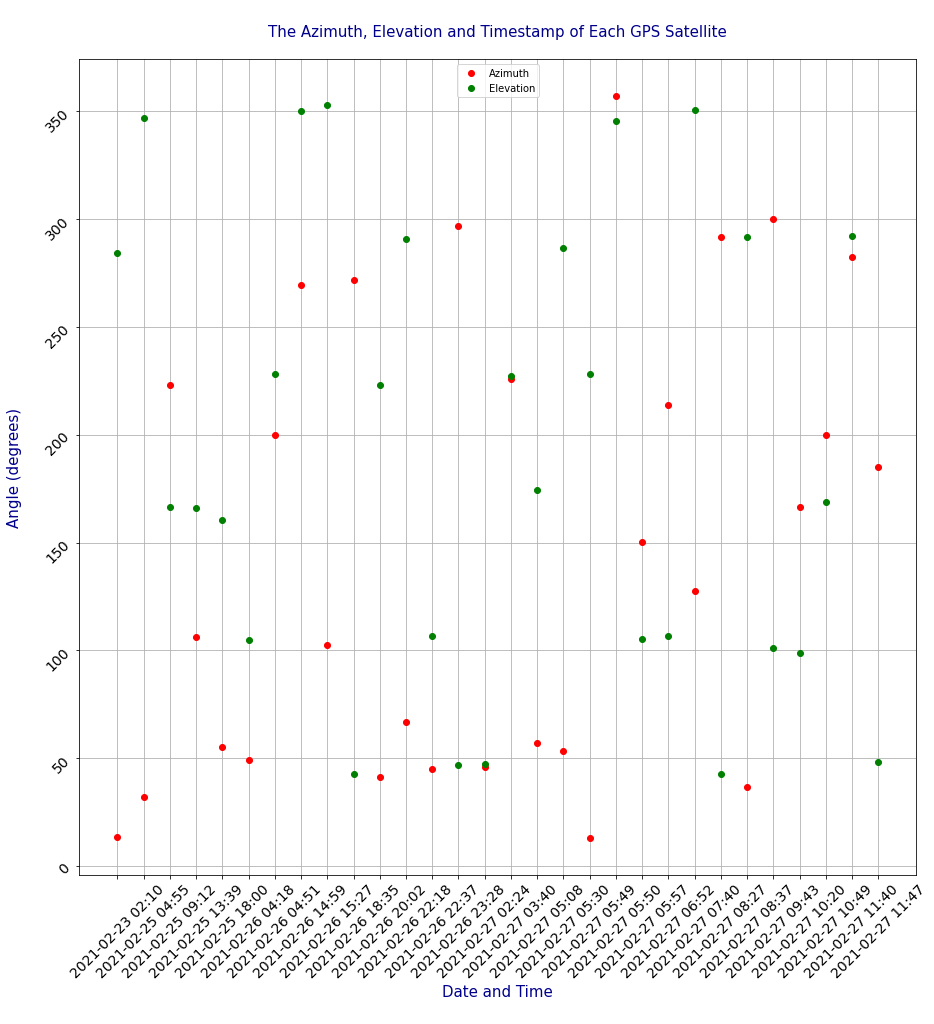

In [11]:
query = gps.df.loc[:,:]

title = "\nThe Azimuth, Elevation and Timestamp of Each GPS Satellite\n"
xLabel = "Date and Time\n"
yLabel = "Angle (degrees)\n"
legend = (['Azimuth', 'Elevation'], 'upper center')

p = Plotting()
p.plotReset()
p.plotScatter('date_time', 'ARG_OF_PERICENTER', query, color='Red')
p.plotScatter('date_time', 'RA_OF_ASC_NODE', query, color='Green')
p.plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
plt.show()

### Each GPS Satellite Is Identified by the Pseudorandom Noise Code - PRN

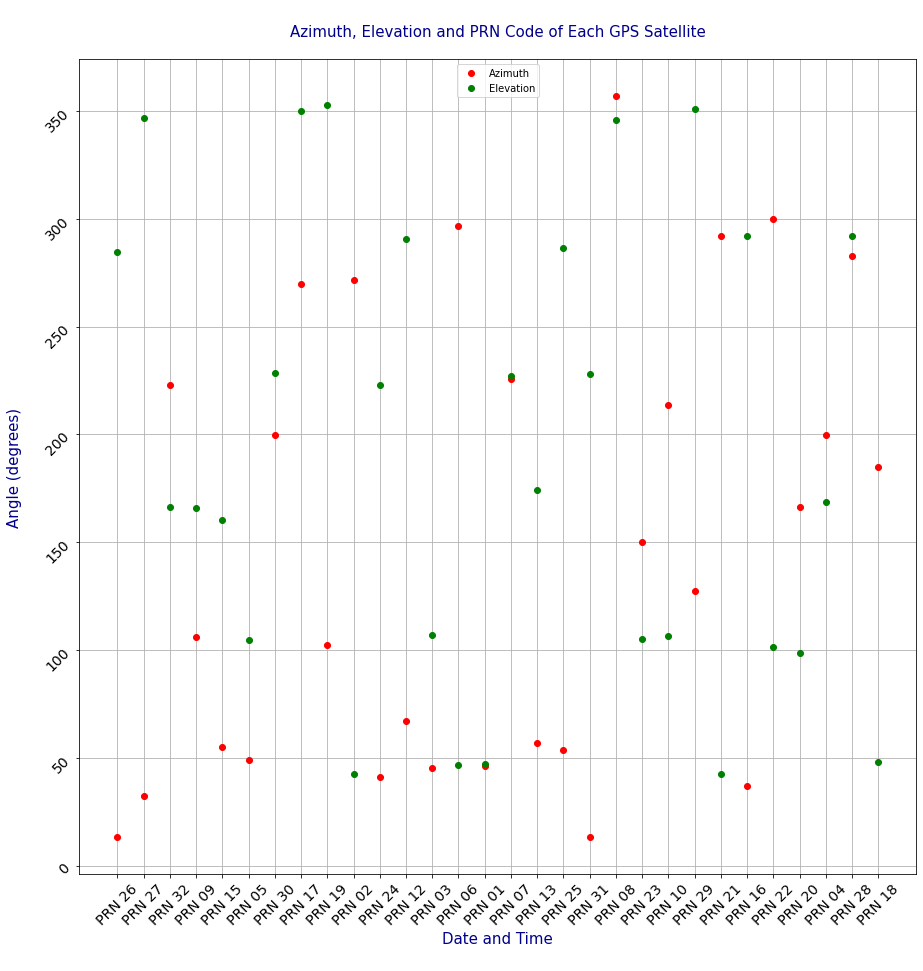

In [12]:
query = gps.df.loc[:,:]

title = "\nAzimuth, Elevation and PRN Code of Each GPS Satellite\n"
xLabel = "Date and Time\n"
yLabel = "Angle (degrees)\n"
legend = (['Azimuth', 'Elevation'], 'upper center')

p = Plotting()
p.plotReset()
p.plotScatter('PRN', 'ARG_OF_PERICENTER', query, color='Red')
p.plotScatter('PRN', 'RA_OF_ASC_NODE', query, color='Green')
p.plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
plt.show()

### Place a label on each satellite

In [13]:
for i in gps.df.index:
    print(f"{gps.df['RA_OF_ASC_NODE'][i]:>10}   "
          f"{gps.df['ARG_OF_PERICENTER'][i]:>10}   "
          f"{gps.df['PRN'][i]:>10}")

  284.5302      13.4005       PRN 26
   346.792       32.049       PRN 27
  166.4018      222.978       PRN 32
  165.8424      106.131       PRN 09
  160.2971      54.9495       PRN 15
  104.7566      49.0187       PRN 05
  228.3462     199.6845       PRN 30
  350.1813     269.6816       PRN 17
  352.7737     102.5369       PRN 19
    42.585     271.6157       PRN 02
  222.8601      41.0468       PRN 24
  290.8332      66.8971       PRN 12
  106.7685      45.0125       PRN 03
   46.7997     296.7084       PRN 06
   47.2678      46.0343       PRN 01
  227.2464       225.93       PRN 07
  174.2118      56.9501       PRN 13
  286.6748      53.4449       PRN 25
  228.1988      13.0585       PRN 31
  345.7653     356.9636       PRN 08
  105.2705     150.2717       PRN 23
  106.5874     213.5868       PRN 10
  350.8578     127.4909       PRN 29
   42.5987     291.9684       PRN 21
  291.8925      36.7787       PRN 16
   101.231     300.1498       PRN 22
   98.5634     166.4038       PRN 20
 

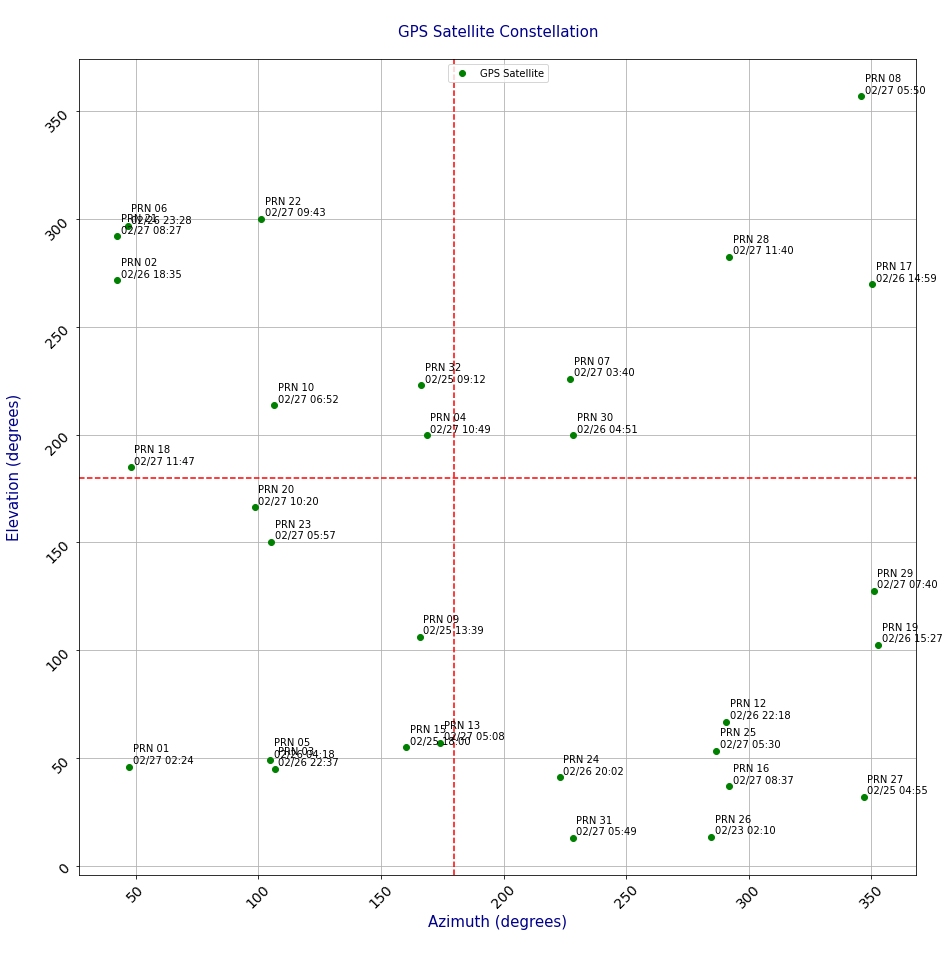

In [14]:
query = gps.df.loc[:,:]

title = "\nGPS Satellite Constellation\n"
xLabel = "Azimuth (degrees)\n"
yLabel = "Elevation (degrees)\n"
legend = (['GPS Satellite', ''], 'upper center')

p = Plotting()
p.plotReset()
p.plotScatter('RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', query, color='Green')
p.plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
p.labelPoints(query)
plt.axhline(y=180, color='r', linestyle='--')
plt.axvline(x=180, color='r', linestyle='--')
plt.show()

<a id="gs4"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 2.4 Analyze The Data

In [15]:
gps.df.describe()

,ARG_OF_PERICENTER,RA_OF_ASC_NODE
count,30.000000,30.000000
mean,149.269277,192.828917
std,105.365455,107.171494
min,13.058500,42.585000
25%,50.125250,104.885075
50%,138.881300,171.425250
75%,225.192000,289.793600
max,356.963600,352.773700


<a id="oo0"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

# 3. Orbital Objects 

There are currently 30 satellites in the GPS constellation contained in 6 orbital planes. Each GPS satellite orbits twice per 24 hour day around the earth. The goal of the GPS constellation is to make sure that at least 4 GPS satellites are covering every point on the earth at any one time. There also exist much space debris (for various reasons) orbiting the earth. For example, a large pattern of space debris was created in 2007 when the Chinese intentionally destroyed its own satellite. The locations of satellites and space debris are mostly public information. This project proposes to monitor GPS satellite locations and their positions in space relative to space debris, including the Chinese anti-satellite missile test debris. The goal of this project is to determine how close space debris might come to our essential GPS fleet.

The GPS satellite data is presented in CSV format by the URL
> https://celestrak.com/NORAD/elements/gp.php?GROUP=GPS-OPS&FORMAT=CSV

It can be copied and pasted into an empty .csv file<br><br>
Similarly, the Chinese debris is available at
> https://celestrak.com/NORAD/elements/gp.php?CATNR=25544&FORMAT=CSV

<a id="oo1"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 3.1 Chinese Anti-Satellite Missile Test Debris

In [16]:
url = "https://celestrak.com/NORAD/elements/gp.php?GROUP=1999-025&FORMAT=csv"
csvFile = 'data/debris-today.csv'
debris = CsvToDataFrame(url, csvFile)
debris.downloadCsvFile()
debris.convertToDataFrame()
debris.transformColumns()
debris.text()


2624 records have been downloaded to the file: /home/kurt/work/gps-satellites/jupyter/data/debris-today.csv
Index is:
Int64Index([23, 18, 26, 21, 11, 14, 19,  8,  6,  7, 17, 10, 22, 20, 16, 13,  0,
            15,  9, 24, 29, 25, 12,  4,  3,  5,  1, 27,  2, 28],
           dtype='int64')

Columns are:
Index(['date_time', 'OBJECT_NAME', 'PRN', 'ARG_OF_PERICENTER',
       'RA_OF_ASC_NODE'],
      dtype='object')

Values are:
[['2021-02-23 02:10' 'GPS BIIF-9  (PRN 26)' 'PRN 26' 13.4005 284.5302]
 ['2021-02-25 04:55' 'GPS BIIF-4  (PRN 27)' 'PRN 27' 32.049 346.792]
 ['2021-02-25 09:12' 'GPS BIIF-12 (PRN 32)' 'PRN 32' 222.978 166.4018]]


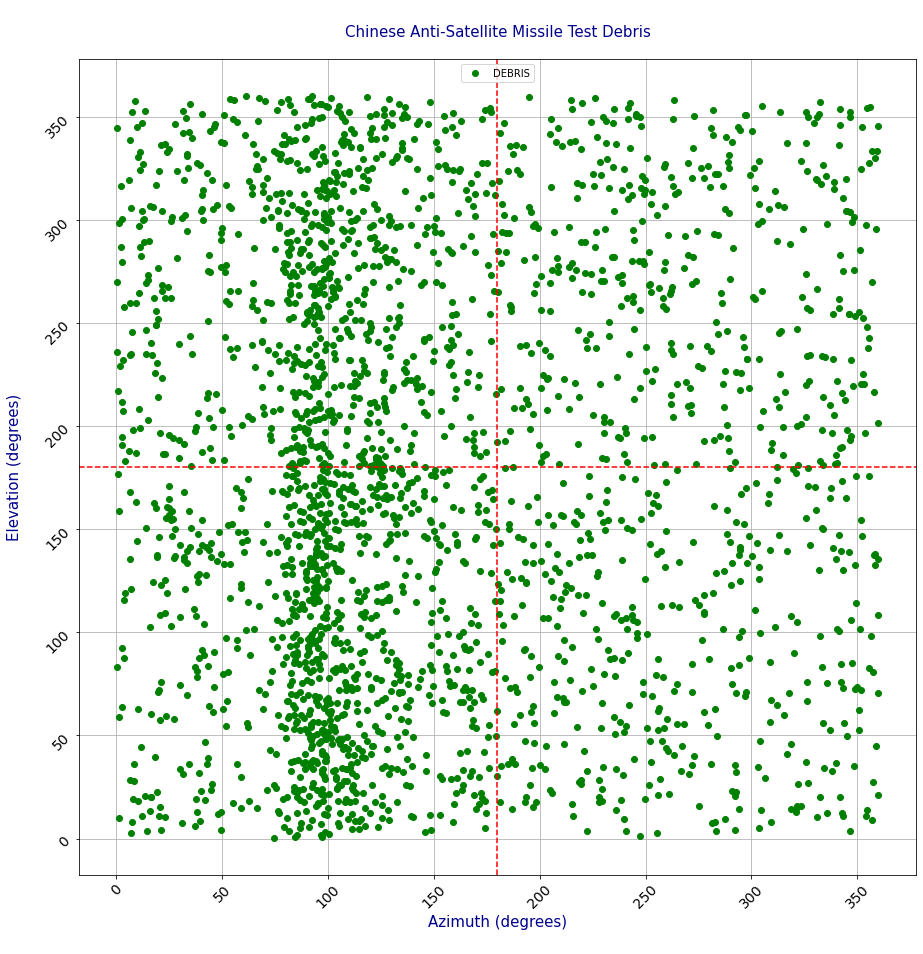

In [17]:
query = debris.df.loc[:,:]

title = "\nChinese Anti-Satellite Missile Test Debris\n"
xLabel = "Azimuth (degrees)\n"
yLabel = "Elevation (degrees)\n"
legend = (['DEBRIS', 'International Space Station'], 'upper center')

p = Plotting()
p.plotReset()
p.plotScatter('RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', query, color='Green')
p.plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
plt.axhline(y=180, color='r', linestyle='--')
plt.axvline(x=180, color='r', linestyle='--')
plt.show()

<a id="oo2"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 3.2 The International Space Station


In [18]:
url = "https://celestrak.com/NORAD/elements/gp.php?GROUP=stations&FORMAT=csv"
csvFile = 'data/iss-today.csv'
iss = CsvToDataFrame(url, csvFile)
iss.downloadCsvFile()
iss.convertToDataFrame()
iss.transformColumns()
iss.text()


71 records have been downloaded to the file: /home/kurt/work/gps-satellites/jupyter/data/iss-today.csv
Index is:
Int64Index([23, 18, 26, 21, 11, 14, 19,  8,  6,  7, 17, 10, 22, 20, 16, 13,  0,
            15,  9, 24, 29, 25, 12,  4,  3,  5,  1, 27,  2, 28],
           dtype='int64')

Columns are:
Index(['date_time', 'OBJECT_NAME', 'PRN', 'ARG_OF_PERICENTER',
       'RA_OF_ASC_NODE'],
      dtype='object')

Values are:
[['2021-02-23 02:10' 'GPS BIIF-9  (PRN 26)' 'PRN 26' 13.4005 284.5302]
 ['2021-02-25 04:55' 'GPS BIIF-4  (PRN 27)' 'PRN 27' 32.049 346.792]
 ['2021-02-25 09:12' 'GPS BIIF-12 (PRN 32)' 'PRN 32' 222.978 166.4018]]


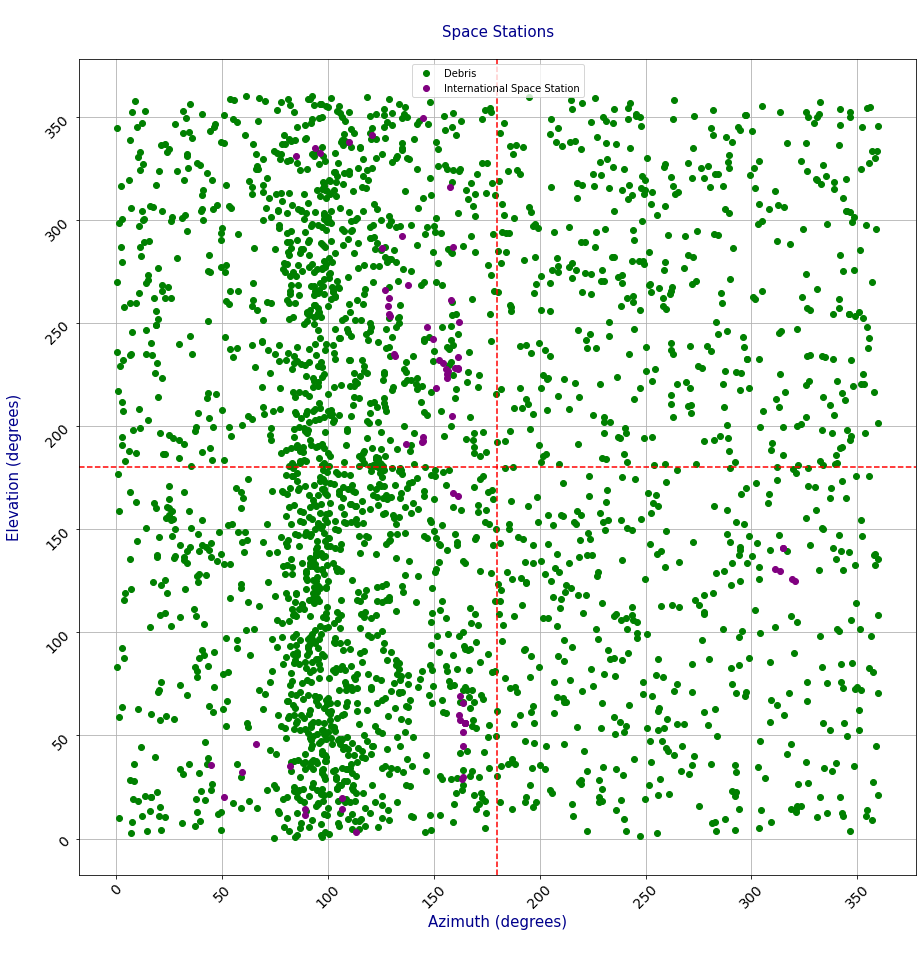

In [19]:
query = iss.df.loc[:,:]

title = "\nSpace Stations\n"
xLabel = "Azimuth (degrees)\n"
yLabel = "Elevation (degrees)\n"
legend = (['Debris', 'International Space Station'], 'upper center')

p = Plotting()
p.plotReset()

p.plotScatter('RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', debris.df.loc[:,:], color='Green')
p.plotScatter('RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', query, color='Purple')
p.plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
plt.axhline(y=180, color='r', linestyle='--')
plt.axvline(x=180, color='r', linestyle='--')
plt.show()

<a id="oo3"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 3.3 The Hubble Space Telescope